# Exploring diffraction geometry using *mdx2* and *nexpy*

This tutorial introduces running *mdx2* from the command line and viewing files with *nexpy*.

We'll use `refined.expt` from the *dials* indexing tutorial.

The result will be `geometry.nxs` which contains the symmetry operators and geometric correction factors.

## Introduction

### *mdx2*

*mdx2* is a python package for processing macromolecular diffuse scattering data. It is open source and [available on GitHub](https://github.com/ando-lab/mdx2).  It shares authorship and general philosophy with the MATLAB library *mdx-lib* described in the following publication:

> [Meisburger, S.P., Case, D.A. & Ando, N. Diffuse X-ray scattering from correlated motions in a protein crystal. Nat Commun 11, 1271 (2020).](https://doi.org/10.1038/s41467-020-14933-6)

As of June 2022, *mdx2* is in the early stages of development. The goal is to replace the data reduction part of *mdx-lib*. Although many important features from *mdx-lib* have not yet been implemented, *mdx2* is already useful as a teaching tool and as a starting point for developing new methods.

In this notebook we will mainly use *mdx2*'s command-line interface.

In [1]:
!mdx2.version

mdx2: 0.0.0


For examples of using *mdx2* within python, see the [6_mdx2_python](6_mdx2_python.ipynb) tutorial.

### *nexpy*

*mdx2* reads and writes data from [nexus files](https://www.nexusformat.org/). Nexus files are hdf5 files. They are combine data and metadata, and work with most programing languages including matlab and python. 

One advantage of this file format is that an excellent GUI has been developed by diffuse scatterers (Ray Osborn and others) called [nexpy](https://github.com/nexpy/nexpy). We'll used *nexpy* and the associated *nexusformat* python module extensively in this workshop.

To launch *nexpy*, open a terminal window in jupyter lab, type `nexpy`, and hit enter.

You'll see something like this:

![NEXPY](resources/nexpy_window.png)

### *python*

Finally, the notebook needs to import some packages, which will mainly be used for plotting.

Before doing anything else, click in the cell below and hit shift-enter

In [2]:
import numpy as np

# for simple plotting
import matplotlib.pyplot as plt

# for displaying tables
import pandas as pd

# for loading nexus files as mdx2 objects
from mdx2.utils import loadobj

## Import the refined geometry from DIALS

The first step is to convert the refined geometry we got from DIALS into the format expected by *mdx2*.

The command for this is `mdx2.import_geometry`.

### Getting help

To see the list of command-line arguments, type the command followed by the `-h` or `--help` flag, as follows:

In [3]:
!mdx2.import_geometry --help

usage: mdx2.import_geometry [-h] [--sample_spacing PHI IY IX]
                            [--outfile OUTFILE]
                            expt

Import experimental geometry using the dxtbx machinery

positional arguments:
  expt                  dials experiments file, such as refined.expt

optional arguments:
  -h, --help            show this help message and exit
  --sample_spacing PHI IY IX
                        inverval between samples in degrees or pixels
                        (default: [1, 10, 10])
  --outfile OUTFILE     name of the output NeXus file (default: geometry.nxs)


### Running the program

Now, run *mdx2.import_geometry* on our experiments file from *DIALS*.

This will produce a file called *geometry.nxs* (the .nxs extension means NeXus format)

In [4]:
!mdx2.import_geometry refined.expt

Computing miller index lookup grid
Computing geometric correction factors
Gathering space group info
Gathering unit cell info
Saving geometry to geometry.nxs
Exporting <class 'mdx2.geometry.Crystal'> to nexus object
  writing crystal to geometry.nxs
Exporting <class 'mdx2.geometry.Symmetry'> to nexus object
  writing symmetry to geometry.nxs
Exporting <class 'mdx2.geometry.Corrections'> to nexus object
  writing corrections to geometry.nxs
Exporting <class 'mdx2.geometry.MillerIndex'> to nexus object
  writing miller_index to geometry.nxs
done!


### Viewing the NeXus file

#### Tree view

NeXus files are organized in a tree form. You can print the tree using `mdx2.tree`;

In [5]:
!mdx2.tree geometry.nxs

geometry.nxs: root:NXroot
  @HDF5_Version = '1.10.6'
  @file_name = '/Users/steve/Documents/GitHub/ando-lab/erice-2...'
  @file_time = '2022-05-30T12:28:47.899831'
  @h5py_version = '3.3.0'
  @nexusformat_version = '0.7.5'
  entry:NXentry
    corrections:NXgroup
      @mdx2_class = 'Corrections'
      @mdx2_module = 'mdx2.geometry'
      attenuation:NXdata
        @axes = ['iy', 'ix']
        @signal = 'signal'
        ix = float64(248)
        iy = float64(254)
        signal = float64(254x248)
      d3s:NXdata
        @axes = ['iy', 'ix']
        @signal = 'signal'
        ix = float64(248)
        iy = float64(254)
        signal = float64(254x248)
      efficiency:NXdata
        @axes = ['iy', 'ix']
        @signal = 'signal'
        ix = float64(248)
        iy = float64(254)
        signal = float64(254x248)
      inverse_lorentz:NXdata
        @axes = ['iy', 'ix']
        @signal = 'signal'
        ix = float64(248)
        iy = float64(254)
        signal = float64(254x248)
   

You can find some interesting metadata.

Find the `symmetry:NXgroup` in the tree above.

<div class="alert alert-block alert-info"> 
    <b>Questions:</b> What is the space group? What is the Laue group? How many operators are there in each? Why are space group operators stored as 3x4 matrices and Laue group operators stored as 3x3 matrices?
</div>

#### Viewing in python

We'll use *matplotlib* and the *mdx2* program loadobj to view a geometric correction

In [3]:
# load correction factors (solid_angle, polarization, attenuation, efficiency, ...)
corrections = loadobj('geometry.nxs','corrections')

Reading corrections from geometry.nxs
  importing as Corrections from mdx2.geometry


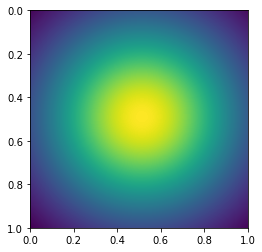

In [4]:
# Plot solid angle per pixel, for example
ax = plt.imshow(corrections.solid_angle,extent=[0,1,1,0])

#### Viewing in *nexpy*

- Open a terminal window and type `nexpy`
- Click `File > open`, navigate to your working directory
- Open `geometry.nxs`
- Expand the tree in the left panel to locate `solid_angle`.
- Double-click it to plot.

The result should look like this:

![NEXPY](resources/nexpy_solid_angle.png)

Take some time to browse through the corrections. Here are some questions to think about:


<div class="alert alert-block alert-info"> 
    <b>Question 1:</b> Find the efficiency correction and plot it. The data were collected using a Pilatus detector, which as a 1 mm thick Si sensor for detecting X-rays. How does the efficiency compare between the center and edge of the detector? Why might that be?
</div>

<div class="alert alert-block alert-info"> 
    <b>Question 2:</b> Find the polarization correction and plot it. Was this data collected on a synchrotron or a home source?
</div>

<div class="alert alert-block alert-info"> 
    <b>Question 3:</b> ind the d3s correction and plot it. This is the volume in reciprocal space swept by a detector pixel during an exposure. Was the spindle axis horizontal or vertical?
</div>